In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
words = open('names.txt','r').read().split()

In [3]:
min(len(word) for word in words),max(len(word) for word in words)

(2, 15)

In [4]:
b = {}
for w in words:
    chs = ['<S>']+list(w)+['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0)+1

In [5]:
sorted(b.items(),key=lambda v:v[1],reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
N = torch.zeros((27,27))

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [7]:
for w in words:
    chs = ['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        N[stoi[ch1],stoi[ch2]]+=1

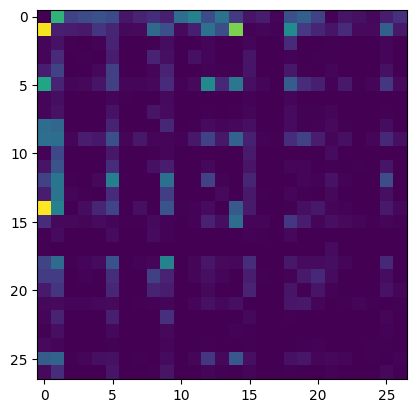

In [8]:
plt.imshow(N)

In [9]:
N[0,:]

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [10]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
g = torch.Generator().manual_seed(2147483647)


In [12]:
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'j'

In [13]:
P = (N+1).float()
P = P/P.sum(1,keepdim=True)

In [14]:
for i in range(50):
    ix = 0
    out = []
    while True:

        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

drla.
kedrphannon.
ja.
rys.
ah.
kee.
a.
miolaronab.
bremind.
seelyan.
a.
kly.
alivessgryaja.
laveildug.
s.
wea.
an.
keron.
kus.
nlely.
keieee.
gajamonian.
gann.
azdirmay.
ka.
amae.
le.
miadydon.
khin.
dellya.
kaialla.
shashocawhalliaramme.
amax.
ayalelisamacamiatreie.
duadhy.
eimpra.
alee.
s.
dokhiard.
jyighuda.
lyawimo.
s.
tonopha.
mada.
li.
an.
juerarexlana.
tykee.
lyimb.
han.


In [15]:
log_likelihood = 0
n=0
for w in ["andrejq"]:
    chs = ['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        print(f'{ch1}{ch2} : {prob:.4f} : {logprob:.4f}')
        n+=1 

print('Log Likelihood {:.4f}'.format(log_likelihood))
nll = -log_likelihood/n
print('Negative Log Likelihood {:.4f}'.format(nll))

.a : 0.1376 : -1.9835
an : 0.1604 : -1.8302
nd : 0.0384 : -3.2594
dr : 0.0770 : -2.5646
re : 0.1334 : -2.0143
ej : 0.0027 : -5.9004
jq : 0.0003 : -7.9817
q. : 0.0970 : -2.3331
Log Likelihood -27.8672
Negative Log Likelihood 3.4834


In [16]:
xs,ys=[],[]

for w in words[:1]:
    chs = ['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        xs.append(ix1)
        ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [17]:
xs

tensor([ 0,  5, 13, 13,  1])

In [27]:
import torch.nn.functional as F

xenc = F.one_hot(xs,27).float()
W = torch.randn((27,27),requires_grad=True)
logits = xenc@W
counts = logits.exp()
prob = counts/counts.sum(1,keepdim=True)

In [28]:
loss = -prob[torch.arange(5),ys].log().mean()
loss = loss.reshape(1)

In [29]:
W.grad=None
loss.backward()

# MLP APPROACH

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [4]:
def build_data(words):
    block_size =3
    X,Y = [],[]
    for w in words:
        context = [0]*block_size

        for ch in w +'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:]+[ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_data(words[:n1])
Xdev,Ydev = build_data(words[n1:n2])
Xte,Yte = build_data(words[n2:])

In [7]:
C = torch.randn((27,10))
W1 = torch.randn((30,200)) * (5/3)/(30**0.5)
b1 = torch.randn(200) *0.01
W2 = torch.randn((200,27))*0.01
b2 = torch.randn(27)*0 

bngain = torch.ones(200)
bnbias = torch.zeros(200)

parameters = [C,W1,b1,W2,b2,bngain,bnbias]

for p in parameters:
    p.requires_grad_()

In [8]:
lre = torch.linspace(-3,0,1000)
lrs = 10**(lre)

In [9]:
lri = []
lossi = []

for i in range(30000):
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]]
    hpreact = emb.reshape(emb.shape[0],-1)@W1+b1
    hpreact = bngain*(hpreact-hpreact.mean(0,keepdim=True))/hpreact.std(0,keepdim=True) + bnbias
    h = torch.tanh(hpreact)
    logits = h@W2+b2
    loss = F.cross_entropy(logits,Ytr[ix])
    if i%1000==0:
        print(i,":",loss.item())

    for p in parameters:
        p.grad=None

    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data+=-lr*p.grad
    

0 : 3.2804195880889893
1000 : 2.714069366455078
2000 : 2.214885711669922
3000 : 2.329810619354248
4000 : 2.568671941757202
5000 : 2.039724349975586
6000 : 2.2951436042785645
7000 : 2.1791603565216064
8000 : 2.058154582977295
9000 : 2.0148956775665283
10000 : 2.211763858795166
11000 : 2.4062557220458984
12000 : 1.9392246007919312
13000 : 2.118886947631836
14000 : 2.042309045791626
15000 : 2.4728360176086426
16000 : 2.4327640533447266
17000 : 2.0383951663970947
18000 : 2.3733224868774414
19000 : 1.978621006011963
20000 : 2.205040454864502
21000 : 2.188453435897827
22000 : 2.1326510906219482
23000 : 2.155259370803833
24000 : 2.182513475418091
25000 : 1.8971291780471802
26000 : 2.474544048309326
27000 : 2.3621768951416016
28000 : 2.2343926429748535
29000 : 1.80777907371521


In [ ]:
with torch.no_grad():
    emb = C[Xtr]
    hpreact = emb.reshape(emb.shape[0],-1)@W1+b1
    hpreact = bngain*(hpreact-hpreact.mean(0,keepdim=True))/hpreact.std(0,keepdim=True) + bnbias
    bnmean = hpreact.mean(0,keepdim=True)
    bnstd = hpreact.std(0,keepdim=True)

In [10]:
print(loss.item())

2.0831332206726074


In [11]:
emb = C[Xdev]
hpreact = emb.reshape(emb.shape[0],-1)@W1+b1
hpreact = bngain*(hpreact-hpreact.mean(0,keepdim=True))/hpreact.std(0,keepdim=True) + bnbias
h = torch.tanh(hpreact)
logits = h@W2+b2
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

2.209313154220581


In [16]:
emb = C[Xte]
hpreact = emb.reshape(emb.shape[0],-1)@W1+b1
hpreact = bngain*(hpreact-hpreact.mean(0,keepdim=True))/hpreact.std(0,keepdim=True) + bnbias
h = torch.tanh(hpreact)
logits = h@W2+b2
loss = F.cross_entropy(logits,Yte)
print(loss.item())

2.2114341259002686


# PyTorch'fy 

In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [19]:
words = open('names.txt', 'r').read().splitlines()

In [18]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [20]:
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [21]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5) #* 0.2
#b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0

# BatchNorm parameters
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True


12097


In [22]:
class Linear:
  
  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None
  
  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out
  
  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 1.0 #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

47024


In [23]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  
  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function
  
  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])



      0/ 200000: 3.2870
